In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

In [5]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [7]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [8]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


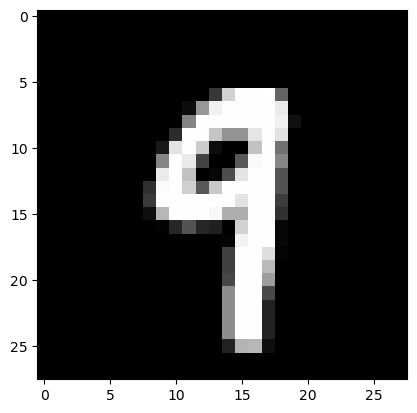

In [10]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

* CNN genellikle görüntü işlemede kullanılan ve girdi olarak görselleri alan bir derin öğrenme algoritmasıdır.
* Farklı operasyonlarla görsellerdeki featureları (özellikleri) yakalayan ve onları sınıflandıran bu algoritma farklı katmanlardan oluşmaktadır.
* Convolutional Layer, Pooling ve Fully Connected olan bu katmanlardan geçen görsel, farklı işlemlere tabii tutularak derin öğrenme modeline girecek kıvama gelir.
* CNN modelleri oluştururken, unstructural (düzensiz) veri ile uğraştığımızdan klasik makine öğrenmesi algoritmalarına kıyasla veri ön işleme kısmında çok uğraşmamaktayız.
* CNN, görüntü sınıflandırması, nesne algılama için kullanılır

 <a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/cnn-1024x235.png.webp" alt="gec2" border="0"></a>

## Convolutional Layer

* Convolutional (evrişim katmanı) CNN algoritmalarında görüntüyü ele alan ilk katmandır. 
* Bilindiği üzere görseller aslında içlerinde belirli değerler taşıyan piksellerden oluşan matrislerdir.
* Evrişim katmanında da orijinal görsel boyutlarından daha küçük bir filtre görselin üzerinde gezer ve bu görsellerden belirli özellikleri yakalamaya çalışır.

<a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/convolutional_operation.gif" alt="gec2" border="0"></a>

* Yukarıda görüldüğü üzere 3×3’lük bir filtre, 5×5’lik bir görsel üzerinde gezdiriliyor.
* Çıkan sonuçlar eşitliğin sağ tarafındaki yeni matrisimiz olan feature map üzerine yazılıyor.
* CNN algoritmalarında öğrenilen parametreler bu filtrelerdeki değerlerdir.
* Model sürekli olarak bu değerleri günceller ve özellikleri daha da iyi tespit etmeye başlar.
* Bunun dışında bazı bilinen filtrelerle görseller keskinleştirilebilir, blur eklenebilir, kenar tespiti yapılabilir. Bunlar için kullanılan filtreler aşağıdaki gibidir.

<a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/CNN-filtreler-nedir.png.webp" alt="gec2" border="0"></a>

## Stride (Adım)
* Stride değeri CNN modellerinde parametre olarak değiştirilebilen bir değerdir.
* Bu değer filtrenin ana görsel üzerinde kaç piksel boyunca kayacağını belirler.
* Örnek vermek gerekirse yukarıdaki evrişim operasyonundaki stride değeri birdir.
* Yani filtre sadece bir piksel atlayarak bu işlemi yapar.
* Stride 2 olsaydı atladığı piksel sayısı artacağından ortaya çıkacak feature map de daha küçük bir hal alacaktı.

## Padding (Dolgu)
* Bir görsele filtreyi uyguladığımızda boyutlardan dolayı çıktı orijinal görselden daha küçük olur.
* Bunu önlemek için kullanabileceğimiz yöntem ise padding yani dolgulamadır.
* Dolgulama işleminde görsele adete bir çerçeve olacakmış gibi dört taraftan da sıfırlar eklenir.
* Filtrenin boyutuna göre bu sıfır eklenen katmanlar artırılabilir.

## ReLU
* ReLU (Rectified Linear Unit) f(x) = max(0,x) şeklinde çalışan doğrusal olmayan bir fonksiyondur.
* Örnek vermek gerekirse -25 değerini alan bir ReLU fonksiyonu çıktı olarak 0’ı, 25 değerini alan bir fonksiyon ise 25’i verir. * Ana amacı negatif değerlerden kurtulmak olan ReLU CNN’lerde oldukça önemli bir konumdadır.

<a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/relu.png.webp" alt="gec2" border="0"></a>

## Pooling
* Evrişimli katman gibi pooling (havuzlama) katmanı da boyutsallığı azaltma amacındadır.
* Bu sayede hem gereken işlem gücü azalır hem de yakalanan gereksiz özellikler yok sayılarak daha önemli özelliklere odaklanılır.

* CNN modellerinde genellikle kullanılan iki farklı pooling tekniği vardır.
* Bunlardan biri Max (Maksimum) diğeri de Average (Ortalama) pooling’tir.

<a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/pooling.png.webp" alt="gec2" border="0"></a>

## Fully Connected Layer (Tam Bağlantılı Katman)
* Fully Connected katmanda birkaç kez evrişimli katmandan ve pooling katmanından geçen ve matris halinde olan görselimiz düz bir vektör haline getirilir.

<a href="https://teknoloji.org/cnn-convolutional-neural-networks-nedir/#:~:text=CNN%20genellikle%20g%C3%B6r%C3%BCnt%C3%BC%20i%C5%9Flemede%20kullan%C4%B1lan,bu%20algoritma%20farkl%C4%B1%20katmanlardan%20olu%C5%9Fmaktad%C4%B1r."><img src="https://d9v7j6n3.rocketcdn.me/wp-content/uploads/2020/11/fully_connected.png.webp" alt="gec2" border="0"></a>

In [11]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# 1
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Conv2D() : convolution oluşturuyoruz 
# filters = 8 içerisinde uyguladığımız filtre sayısı (istediğimiz kadar yazabiliriz)
# kernel_size = (5,5) filtre boyutumuz 5'e 5
# padding = 'Same'  veri kaybı olmaması için same padding kullanıyoruz
# activation ='relu' aktivasyon fonksiyonumuz
# input_shape = (28,28,1) 28,28 x ve y matrisi 1 ise gray scale oluduğunu yani gri renk tonunu belirtiyor 
# MaxPool2D max Pooling ekliyoruz. Bu ise aldığımız filtrelerdeki verilerin içerisinden maksimum veriyi seçiyor bize
# pool_size=(2,2) 2'ye 2 lik bir matrisdeki değerlerin içerisinden maksimum değerini alıyoruz
# Dropout(0.25) random bir şekilde  4'de 1 inputu kapat demek. Overfitting'i engellemek için kullanıyoruz

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [12]:
# optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [13]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
epochs = 10  
batch_size = 250

In [15]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [16]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 28s 179ms/step - loss: 1.1417 - accuracy: 0.6174 - val_loss: 0.2159 - val_accuracy: 0.9429
Epoch 2/10
151/151 [==============================] - 24s 160ms/step - loss: 0.4086 - accuracy: 0.8705 - val_loss: 0.1224 - val_accuracy: 0.9648
Epoch 3/10
151/151 [==============================] - 25s 166ms/step - loss: 0.2933 - accuracy: 0.9076 - val_loss: 0.0914 - val_accuracy: 0.9724
Epoch 4/10
151/151 [==============================] - 26s 170ms/step - loss: 0.2506 - accuracy: 0.9223 - val_loss: 0.0801 - val_accuracy: 0.9762
Epoch 5/10
151/151 [==============================] - 26s 169ms/step - loss: 0.2151 - accuracy: 0.9340 - val_loss: 0.0723 - val_accuracy: 0.9779
Epoch 6/10
151/151 [==============================] - 25s 167ms/step - loss: 0.1980 - accuracy: 0.9394 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 7/10
151/151 [==============================] - 26s 172ms/step - loss: 0.1829 - accuracy: 0.9431 - val_loss: 0.0602 - val_ac

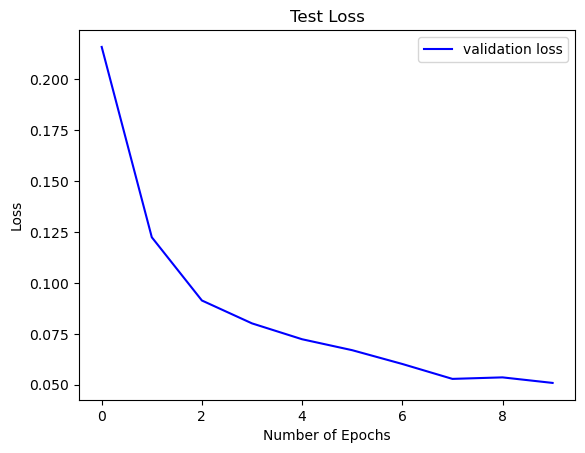

In [17]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 4ms/step


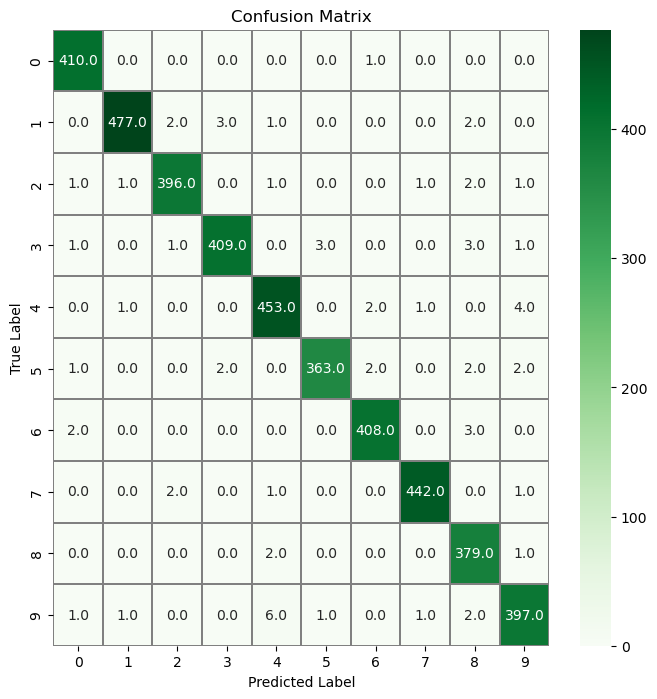

In [18]:
# confusion matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()